<a href="https://colab.research.google.com/github/s-prak/FMML_Projects_and_Labs/blob/main/Copy_of_Anomaly_Detection_and_KMeans_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

## Anomaly/Outlier Detection

Anomalies can sometimes lead to some discoveries. For example an anomalous bank withdrawal (with say multiple PIN attempts) can be an indicator of a fraudulent transaction. Or anomalous memory usage in a server station can indicate a bug.

These kinds of anomalies ned to be spotted quickly to avoid damage. Noise and anomalies are however, not the same.

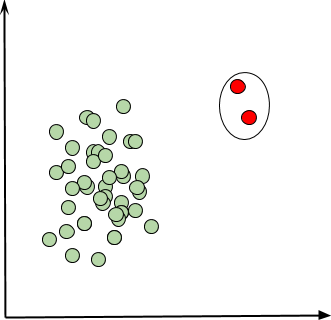

In the above data, the red dots seem to be outliers.

**Excercise 1 (Histogram based Anomaly Detection)**

Is a simple classification algorithm suitable for anomaly detection? (Hint - Is accuracy the correct metric?)

Simple classification algorithms can sometimes be suitable for anomaly detection, depending on the nature of the data and the anomalies you're trying to detect. However, their effectiveness may vary depending on the complexity of the anomalies and the distribution of the data.

Here are a few points to consider:

1. **Nature of Anomalies**: If anomalies in your data are well-separated from normal instances, a simple classification algorithm like k-nearest neighbors (KNN), support vector machines (SVM), or decision trees may be sufficient. These algorithms can identify outliers or anomalies that lie far from the majority of data points.

2. **Feature Representation**: The choice of features is crucial for the effectiveness of simple classification algorithms in anomaly detection. If you have meaningful and relevant features that adequately capture the characteristics of normal and anomalous instances, then a simple classification algorithm may perform well.

3. **Scalability**: Simple classification algorithms may not scale well with large datasets. If your dataset is massive, more sophisticated anomaly detection techniques like clustering-based methods, density estimation, or deep learning approaches may be more suitable.

4. **Imbalanced Data**: Anomaly detection tasks often involve highly imbalanced datasets, where normal instances significantly outnumber anomalies. Simple classification algorithms might struggle with imbalanced data, and you may need to employ techniques like oversampling, undersampling, or using algorithms specifically designed for imbalanced datasets.

5. **Complex Anomalies**: If anomalies in your data are complex and not easily separable from normal instances, simple classification algorithms may not be effective. In such cases, you might need more advanced techniques like ensemble methods, neural networks, or unsupervised learning approaches.

In summary, while simple classification algorithms can sometimes be suitable for anomaly detection, it's essential to consider the characteristics of your data and the types of anomalies you're trying to detect. In many cases, more sophisticated techniques may be required for effective anomaly detection, especially with large, complex, or highly imbalanced datasets.

The confusion matrix looks like this

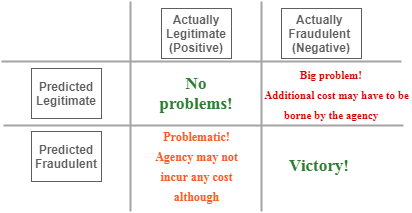

In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.8 MB/s eta 0:00:00


In [ ]:
# We will first generate the data

# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comment out the following line if you are using Jupyter Notebook
# %matplotlib inline
# Use a predefined style set
plt.style.use('ggplot')

# Import Faker
from faker import Faker
Faker.seed(4321)
fake = Faker()

# To ensure the results are reproducible

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [ ]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


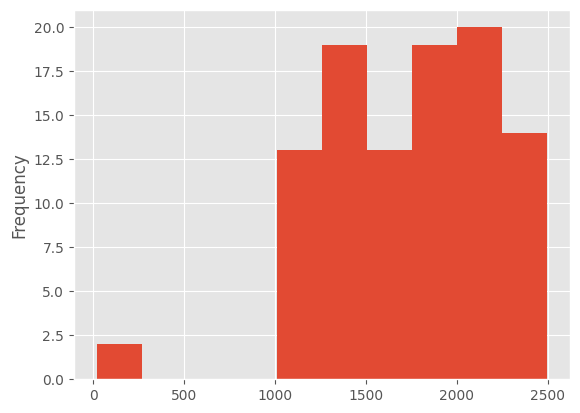

In [ ]:
# Generate a Histogram plot
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

We can visually see the anomalies!

### Exercise 2

What is a mathematical way for anomaly detection? (Hint - Model data to be Gaussian distribution / Does the Reverse Nearest Neighbour reveal something about the anomalies?)

### Clustering based approach for anomaly detection

We have seen how clustering and anomaly detection are closely related but they serve different purposes. But clustering can be used for anomaly detection. In this approach, we start by grouping the similar kind of objects.

In [ ]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [ ]:
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans

# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(salary_raw, 4)

In [ ]:
# Get the groups (clusters) and distances
from scipy.cluster.vq import vq

groups, cdist = vq(salary_raw, centroids)

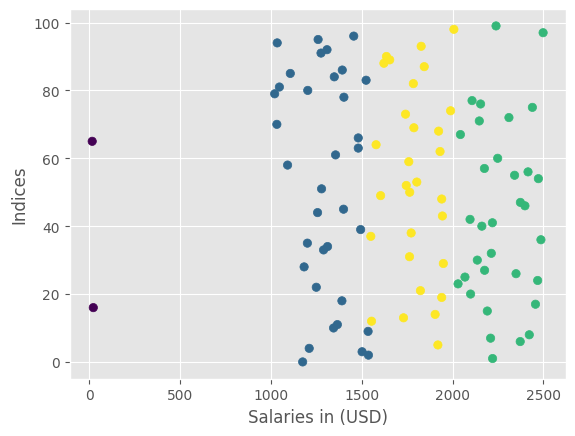

In [ ]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

The above method for anomaly detection is purely unsupervised in nature. If we had the class-labels of the data points, we could have easily converted this to a supervised learning problem, specifically a classification problem.

If we were also given the labels, we could perform a modified version of classification, which is a supervised learning process.

## KMeans for Image Compression

As you know an image is made of mutiple pixels each of which have their color values (RGB). But what if we clustered pixels with similar color values together and replaced all pixels in a cluster by their closest color? This would highly reduce the space required to store the image.

In [ ]:
#import neccessary libraries
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
image_location = 'https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg'


Image shape = (1200, 1600, 3)


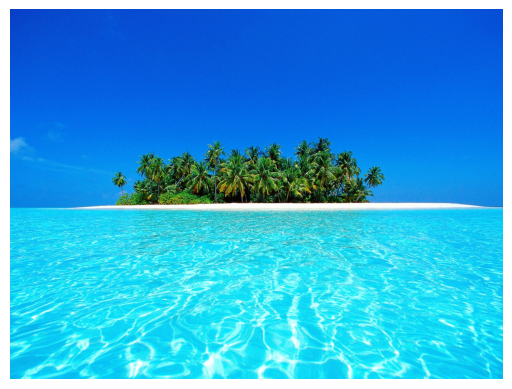

Total Pixels = 1920000
Data Sample: 


array([[  3,  57, 192],
       [  9,  63, 198],
       [ 12,  66, 201]], dtype=uint8)

In [ ]:
image = io.imread(image_location)

#Lets check out the dimensions of the numerical representation of the image
print("Image shape = " + str(image.shape))

#View the image using matplotlib
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN
# Each row is now a vector in the 3-D space of RGB
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

#Peek into the data to understand coordinates
print("Data Sample: ")
all_pixels[:3]

In [ ]:
print(image)

{'pic_cluster.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x06@\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x001\x00\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf2v\xc9\xcdn\xf1\xd6$\xd6\x0b&\x85\x0c\x1c\x8a\x9cT\x94\xd5\xa5\x1bU`\xf4D:F\x90\x90\x9b\xd8;%\xe6\xd4F6^\x9c3]q\x86\xc5\xe59\x94V\xa7=\xed\'>}x\x99+\x92(\xa2l\xaaon\xa8\xe0\xd3\xaa\x8c\xa8\xe4:\xa3\x8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


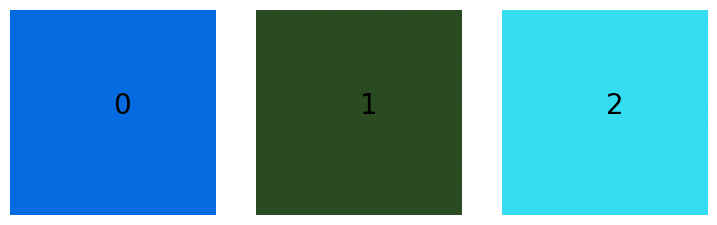

In [ ]:
#Update the optimal value of k below
k=3

#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [ ]:
#Let us "compress" the image
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

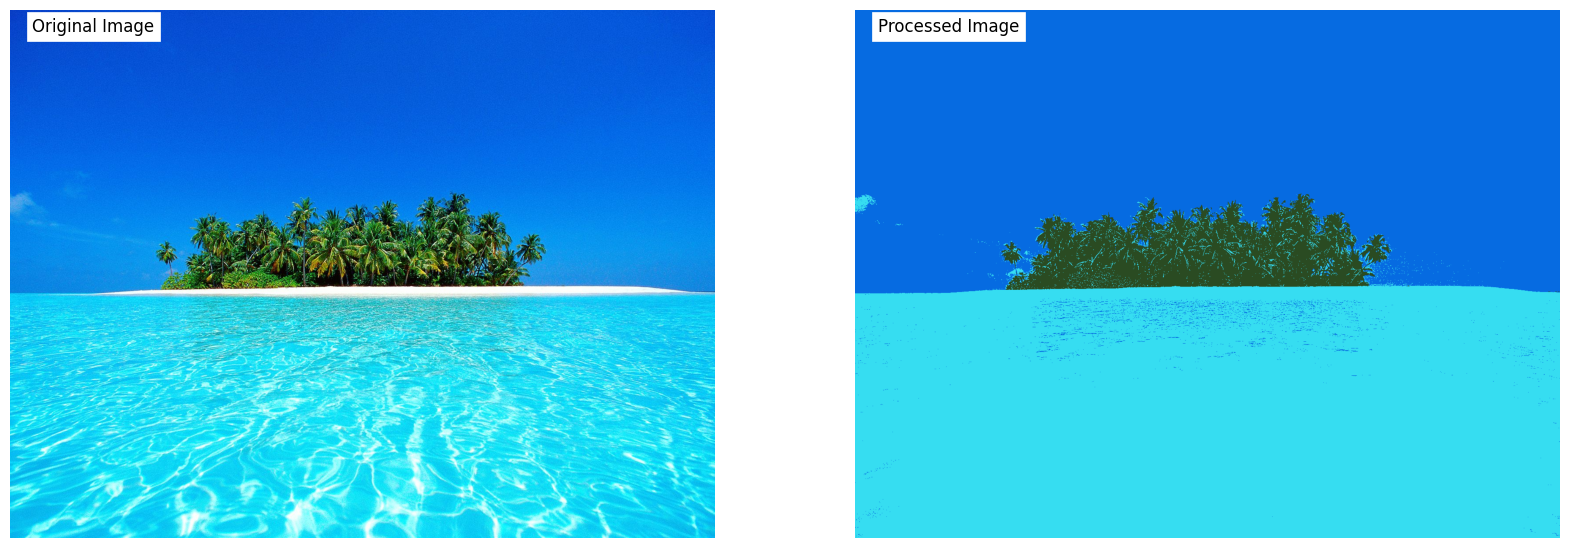

In [ ]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()

Now, we compare the effect of varying K.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


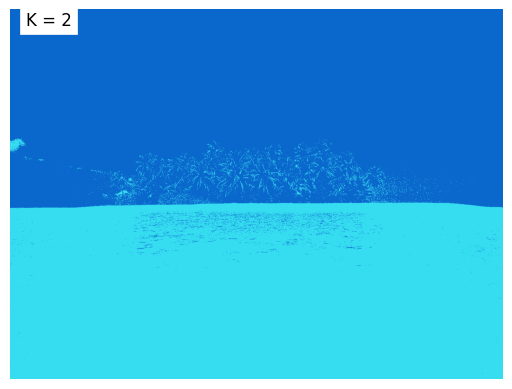

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


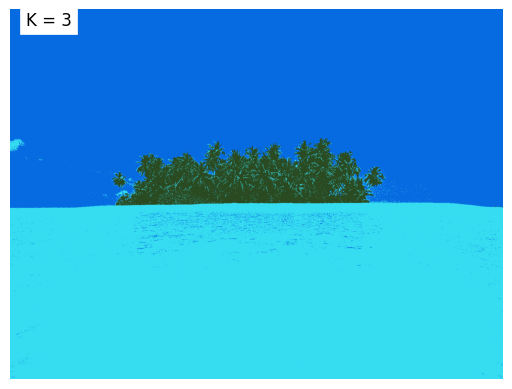

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


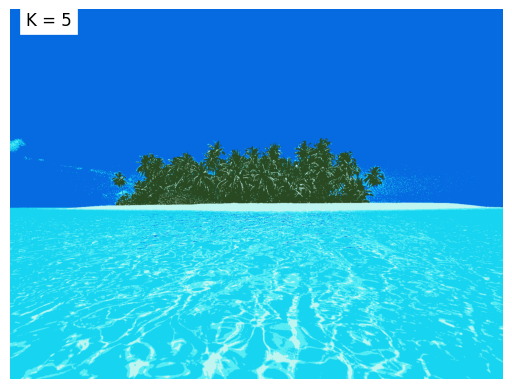

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


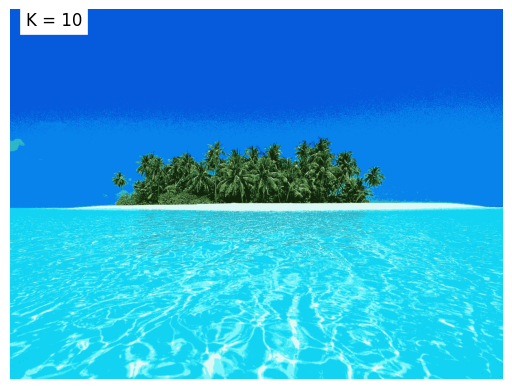

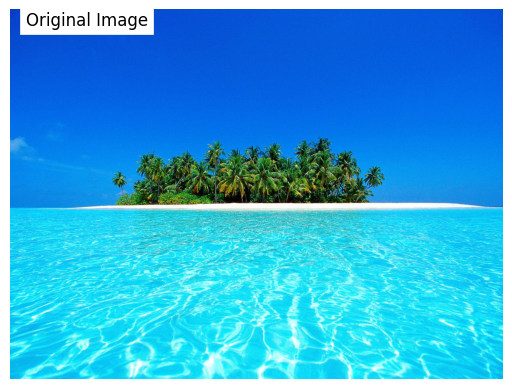

In [ ]:
K = [2, 3, 5, 10]
for k in K:

  # print("K =", k)
  #Build a clustering model on the pixels
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(all_pixels)
  kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

  image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
  for ix in range(all_pixels.shape[0]):
      image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
  image_compressed = image_compressed.reshape(image.shape)

  plt.imshow(image_compressed)
  plt.text(50,50,"K = " + str(k), fontsize=12, c = 'black', backgroundcolor = 'white')
  plt.axis(False)
  plt.show()

plt.imshow(image)
plt.text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
plt.axis(False)
plt.show()

You can replace the image above with your own and see how it looks!

## Resouces and References

1. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
2. https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/
3. https://www.kaggle.com/aryan27/k-means-clustering

In [ ]:
from google.colab import files

# Prompt the user to upload files
image = files.upload()

Saving pic_cluster.jpg to pic_cluster (1).jpg


Image shape = (1600, 1200, 3)


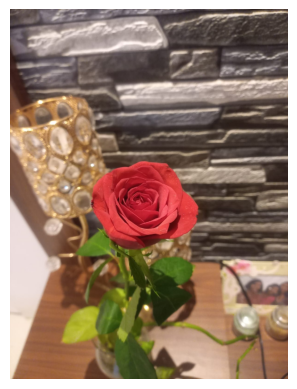

Total Pixels = 1920000
Data Sample: 


array([[75, 62, 54],
       [75, 62, 54],
       [75, 62, 56]], dtype=uint8)

In [ ]:
image_filename = list(uploaded.keys())[0]

# Read the uploaded image using io.imread()
image = io.imread(image_filename)

#Lets check out the dimensions of the numerical representation of the image
print("Image shape = " + str(image.shape))

#View the image using matplotlib
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN
# Each row is now a vector in the 3-D space of RGB
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

#Peek into the data to understand coordinates
print("Data Sample: ")
all_pixels[:3]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


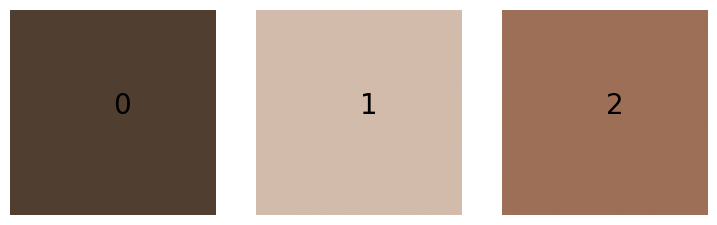

In [ ]:
#Update the optimal value of k below
k=3

#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [ ]:
#Let us "compress" the image
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

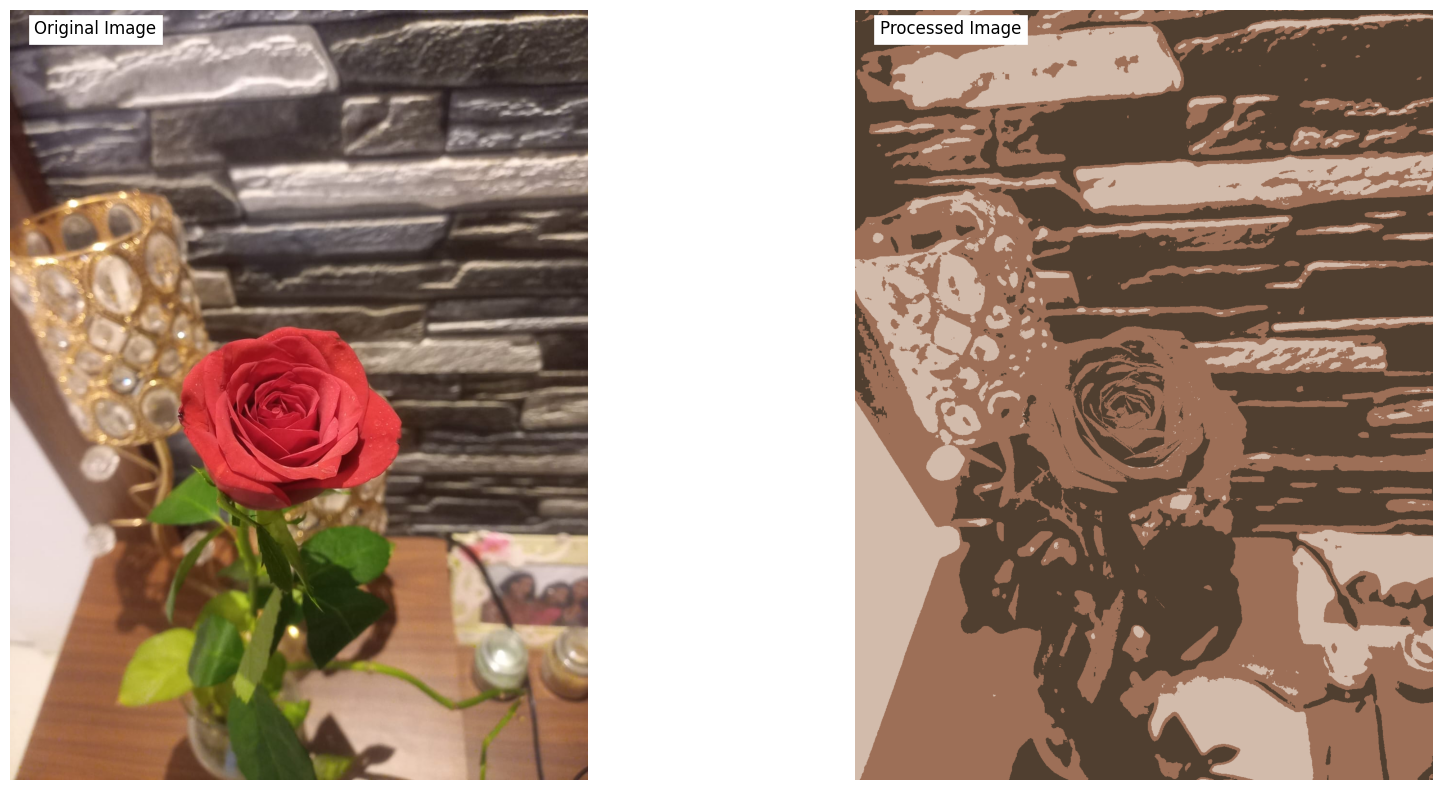

In [ ]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


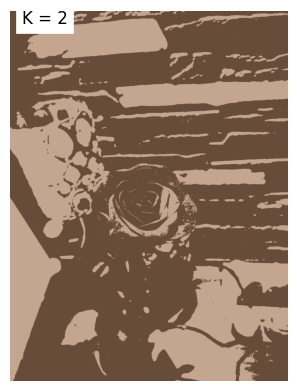

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


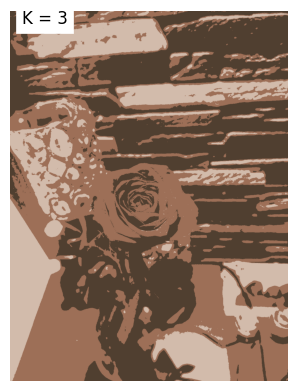

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


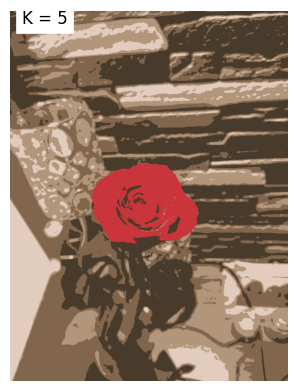

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


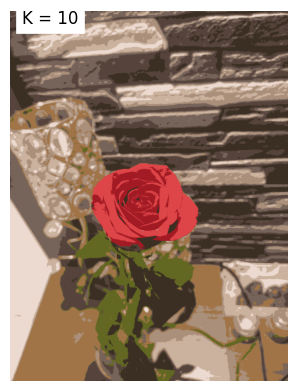

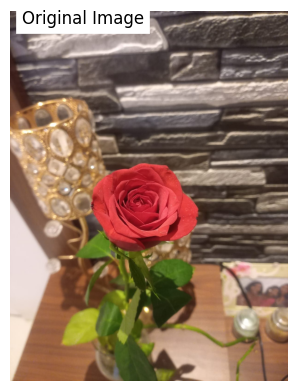

In [ ]:
K = [2, 3, 5, 10]
for k in K:

  # print("K =", k)
  #Build a clustering model on the pixels
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(all_pixels)
  kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

  image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
  for ix in range(all_pixels.shape[0]):
      image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
  image_compressed = image_compressed.reshape(image.shape)

  plt.imshow(image_compressed)
  plt.text(50,50,"K = " + str(k), fontsize=12, c = 'black', backgroundcolor = 'white')
  plt.axis(False)
  plt.show()

plt.imshow(image)
plt.text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
plt.axis(False)
plt.show()